<a href="https://colab.research.google.com/github/pranesh0312/Zidio_Data-Science-and-Analytics_Internship_Projects/blob/main/Project_2_Speech_Emotion_Regonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [ ]:
#To download the dataset from Kaggle
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 426M/428M [00:19<00:00, 25.0MB/s]
100% 428M/428M [00:19<00:00, 23.0MB/s]


In [ ]:
#To extract the data from the zip file
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

To collects the paths of the audio files and extracts their labels (emotions)

In [ ]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
#To view the length of the Paths
len(paths)

2800

In [ ]:
#To view the first 5 rows
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_rain_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_ripe_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_chain_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_haze_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_yes_fear.wav']

In [ ]:
#To view the first 5 rows
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear


In [ ]:
#To view the value counts in the label column
df['label'].value_counts()

,count
label,
fear,400
angry,400
happy,400
sad,400
ps,400
neutral,400
disgust,400


In [ ]:
df['label_count']= df['label'].value_counts()

In [ ]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear
...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust
2796,/content/tess toronto emotional speech set dat...,disgust
2797,/content/tess toronto emotional speech set dat...,disgust
2798,/content/tess toronto emotional speech set dat...,disgust


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,fear,NaN
1,/content/tess toronto emotional speech set dat...,fear,NaN
2,/content/tess toronto emotional speech set dat...,fear,NaN
3,/content/tess toronto emotional speech set dat...,fear,NaN
4,/content/tess toronto emotional speech set dat...,fear,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust,NaN
2796,/content/tess toronto emotional speech set dat...,disgust,NaN
2797,/content/tess toronto emotional speech set dat...,disgust,NaN
2798,/content/tess toronto emotional speech set dat...,disgust,NaN


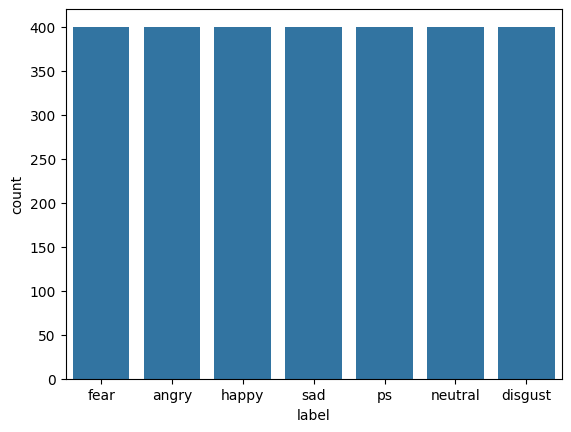

In [ ]:
#To view the Label count graphically
sns.countplot(data=df, x='label')
df

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...  fear
1  /content/tess toronto emotional speech set dat...  fear
2  /content/tess toronto emotional speech set dat...  fear
3  /content/tess toronto emotional speech set dat...  fear
4  /content/tess toronto emotional speech set dat...  fear
['fear' 'angry' 'happy' 'sad' 'ps' 'neutral' 'disgust']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_rain_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_ripe_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_chain_fear.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_back_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_fail_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_lean_disgust.wav'],
      dtype=object)

To Plots the waveform and spectrogram and plays the audio for all Emotions in the dataset

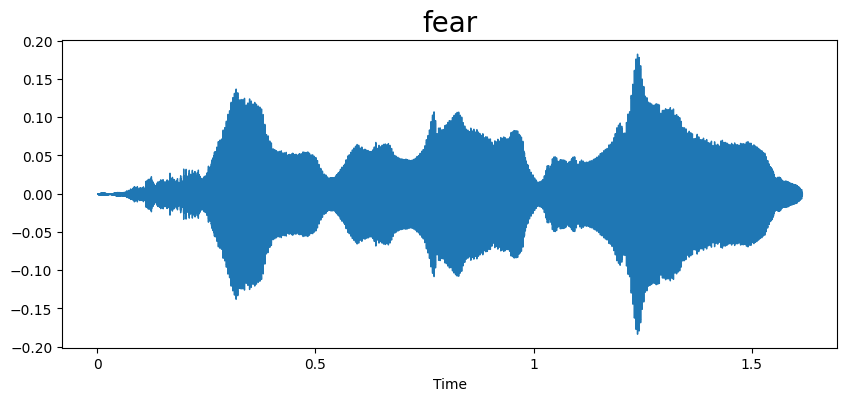

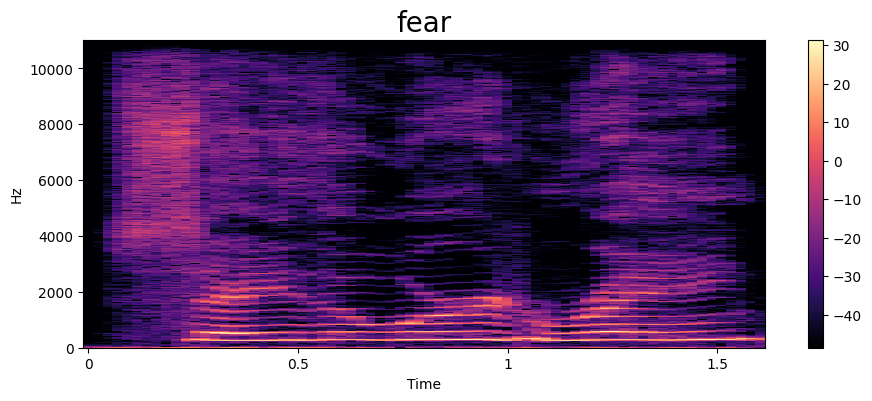

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

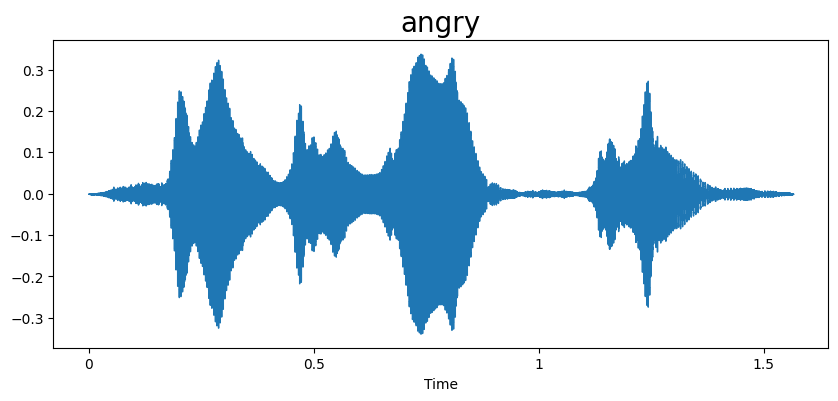

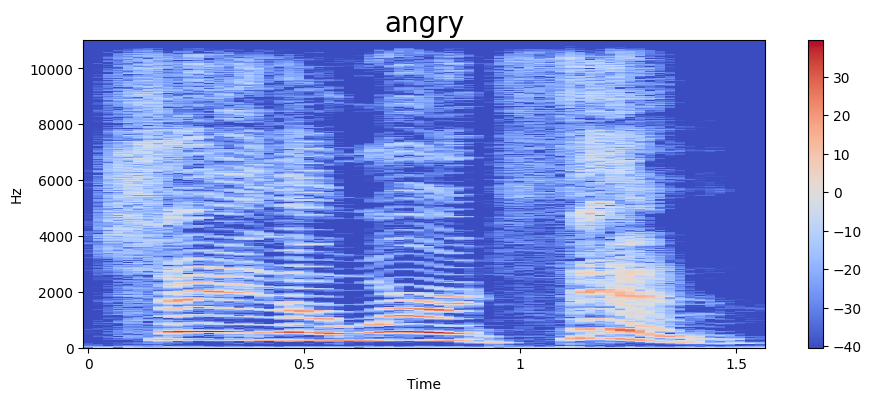

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

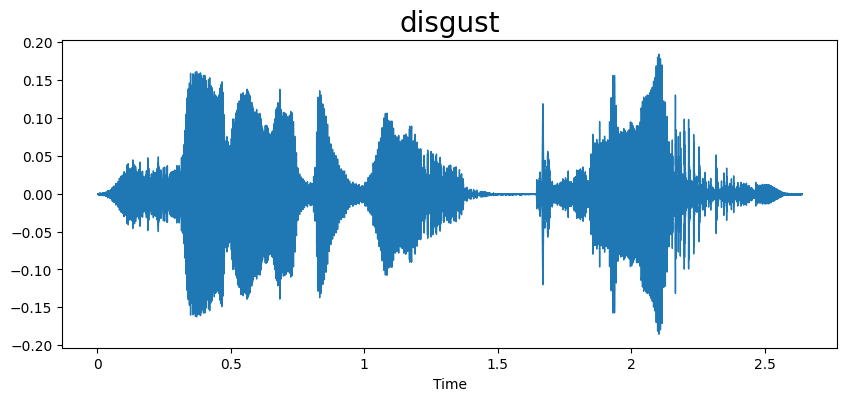

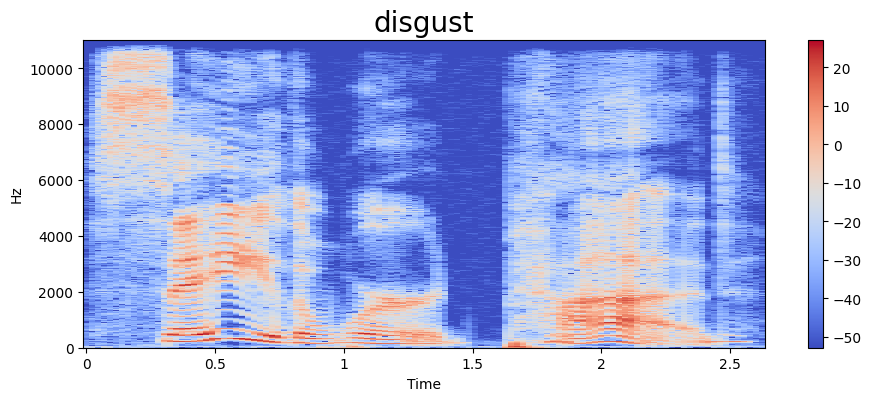

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

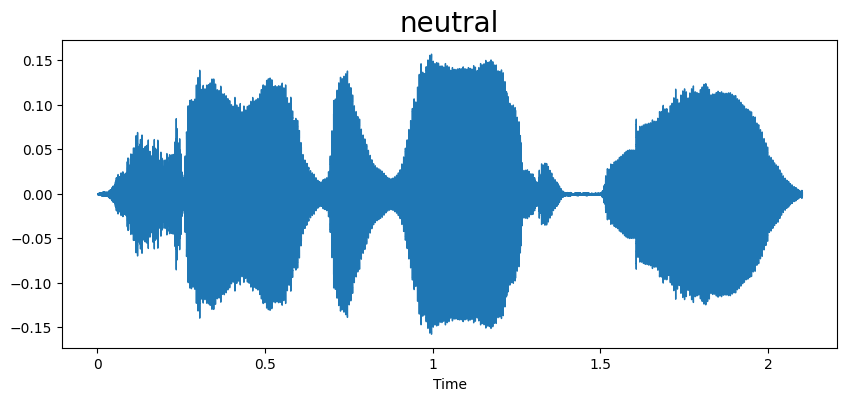

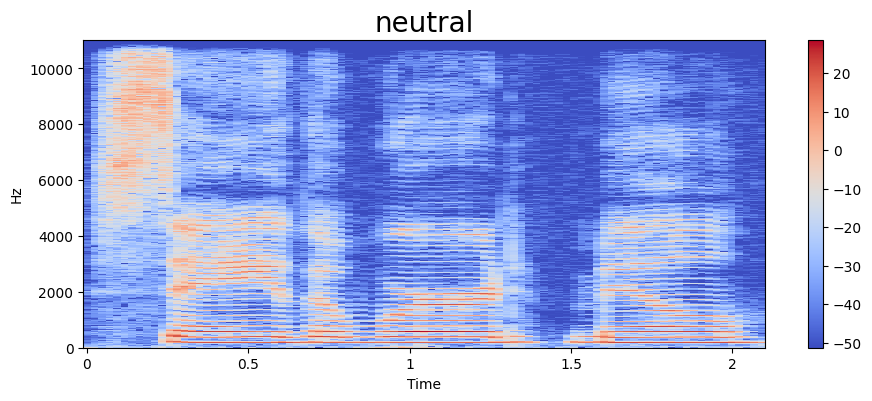

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

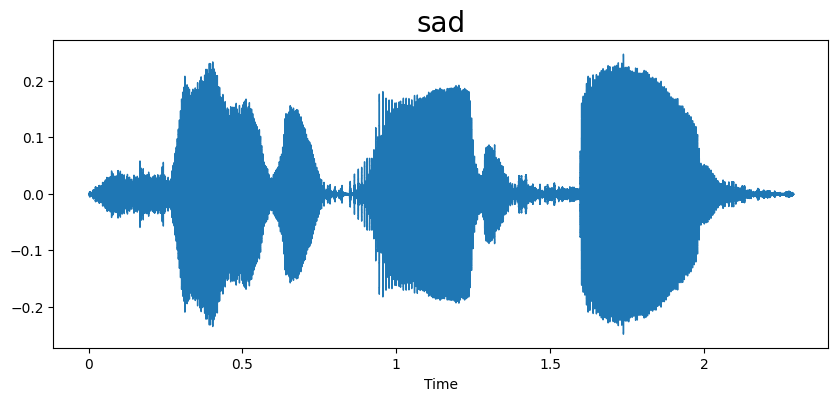

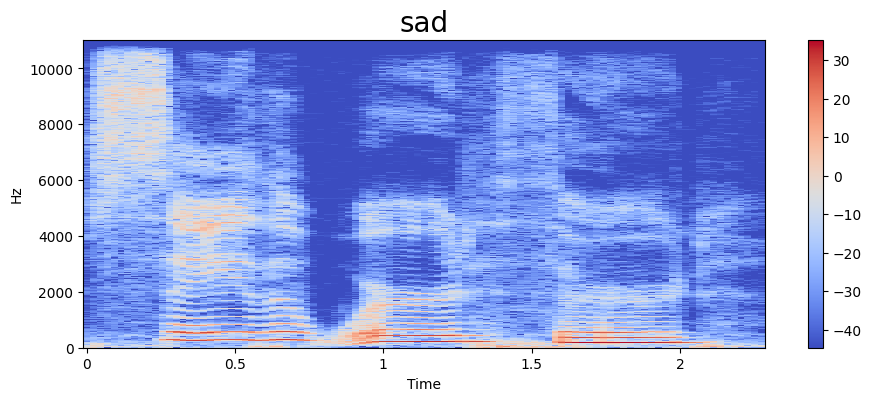

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

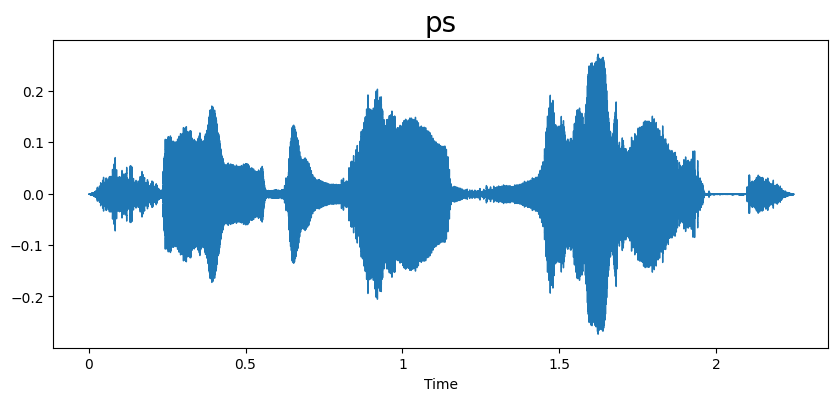

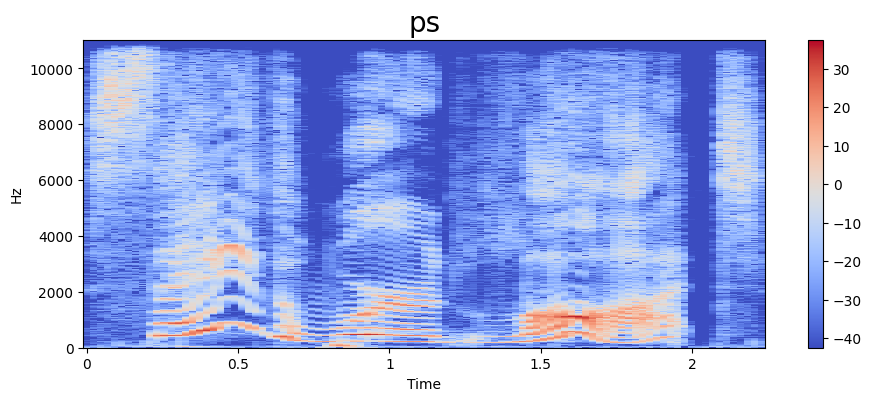

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

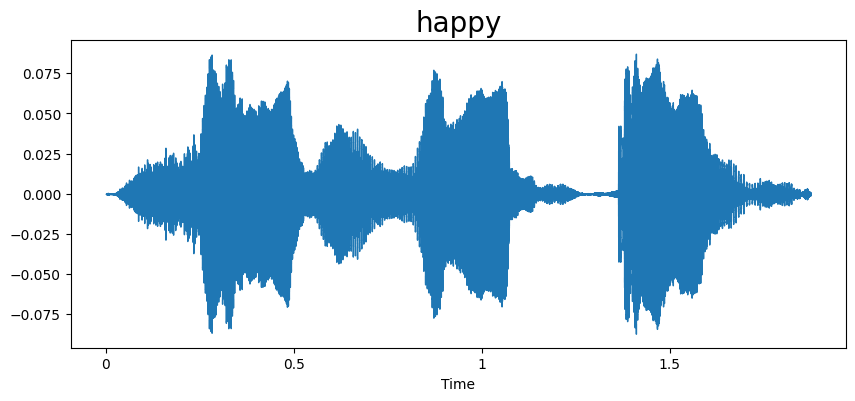

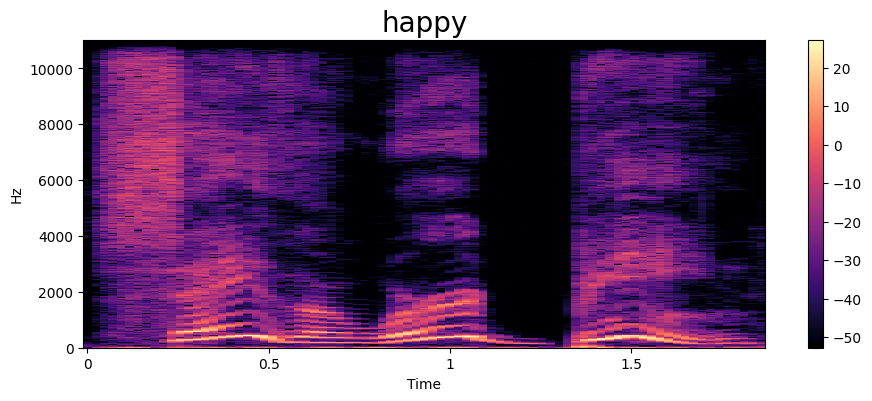

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

To extract the Mel-frequency cepstral coefficients (MFCCs)

In [ ]:
# MFCC Extraction Function
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
# Applying the extract_mfcc function to the first element in the speech column
extract_mfcc(df['speech'][0])

array([-4.31117828e+02,  9.45852280e+01,  1.96813488e+01, -2.12909660e+01,
       -2.12266374e+00,  3.62139153e+00, -1.75080700e+01,  4.67170864e-01,
       -1.89932022e+01, -1.49241428e+01, -1.89274235e+01, -1.37806997e+01,
       -1.21929483e+01,  1.05640344e-01, -1.29259567e+01,  3.05500102e+00,
       -5.88384771e+00, -2.83508182e-01,  2.30581999e+00, -9.18024158e+00,
       -4.53260136e+00,  1.07133245e+01,  1.49218626e+01,  3.36614304e+01,
        3.56723709e+01,  3.73098145e+01,  1.73112659e+01,  8.76718998e+00,
       -6.01099777e+00,  3.49430799e-01,  2.08356237e+00,  2.61193681e+00,
        1.07919347e+00, -9.88999844e+00, -4.22735119e+00,  5.48391962e+00,
       -1.80390429e+00, -1.74135536e-01, -9.45276642e+00, -2.81684780e+00],
      dtype=float32)

In [ ]:
#Applying Lambda fuction to extract MFCC features from each audio file path listed in the speech column
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-431.11783, 94.58523, 19.681349, -21.290966, ..."
1,"[-456.00708, 92.37283, 10.283129, -25.819382, ..."
2,"[-402.99747, 58.956947, 1.4766296, 13.658957, ..."
3,"[-438.58746, 63.088146, 6.6511555, 4.558683, 4..."
4,"[-439.88983, 56.936207, 12.309538, -0.4282845,..."
...,...
2795,"[-478.49063, 110.54656, 21.086607, 7.124192, 1..."
2796,"[-463.5022, 100.19231, 24.626255, 13.263413, 2..."
2797,"[-493.02606, 120.17645, 10.21264, -7.618184, 1..."
2798,"[-456.3248, 91.21358, 23.793959, -5.765943, 14..."


In [ ]:
#Converting the data into Numpy Arrays
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# input split(Adding a new dimension)
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

Encoding the data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
#Converting to NumpyArray
y = y.toarray()
y.shape

(2800, 7)

Test-Train-Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Data Modelling

In [ ]:
#Create the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2343 - loss: 1.8519 - val_accuracy: 0.4804 - val_loss: 1.3660
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4794 - loss: 1.2850 - val_accuracy: 0.7143 - val_loss: 0.7508
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6198 - loss: 0.9488 - val_accuracy: 0.8071 - val_loss: 0.4848
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7624 - loss: 0.6486 - val_accuracy: 0.9089 - val_loss: 0.2767
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8366 - loss: 0.5065 - val_accuracy: 0.9357 - val_loss: 0.2009
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8830 - loss: 0.3725 - val_accuracy: 0.9571 - val_loss: 0.1305
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9283 - loss: 0.2593 - val_accuracy: 0.9482 - val_loss: 0.1620
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9401 - loss: 0.1990 - val_accuracy: 0.9393 - val_loss

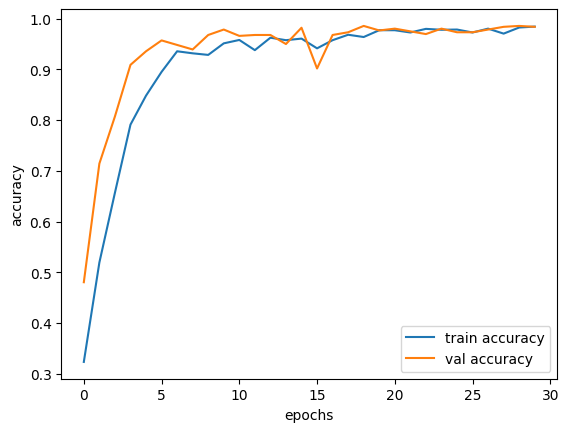

In [ ]:
#Plot the results
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

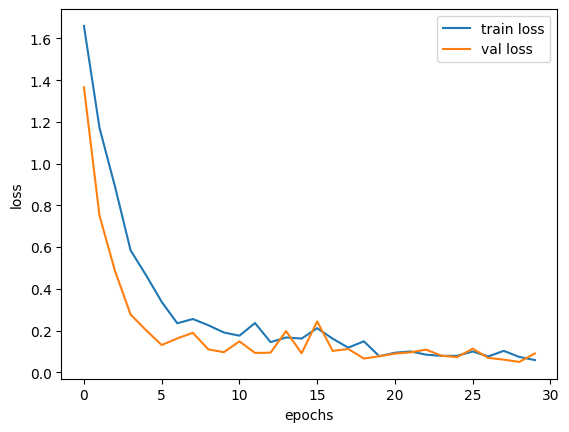

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[75  0  0  1  0  0  0]
 [ 1 69  0  0  0  0  0]
 [ 0  1 76  0  0  0  0]
 [ 0  1  0 94  0  0  0]
 [ 0  0  0  0 96  0  0]
 [ 3  1  0  1  0 64  0]
 [ 0  0  0  0  0  0 77]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.95      0.99      0.97        76
     disgust       0.96      0.99      0.97        70
        fear       1.00      0.99      0.99        77
       happy       0.98      0.99      0.98        95
     neutral       1.00      1.00      1.00        96
          ps       1.00      0.93      0.96        69
         sad       1.00      1.00      1.00        77

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



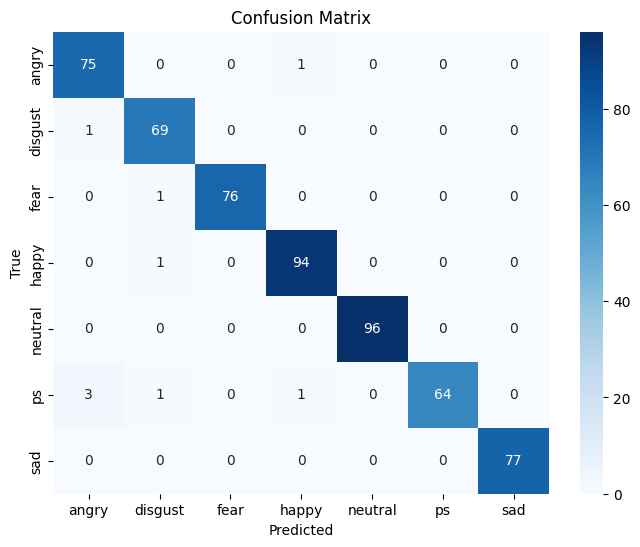

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()